In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import torch
import copy
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

# Add the parent directory to the Python path - bad practice, but it's just for the example
import sys
sys.path.append("/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/")

device = "cuda:0" if torch.cuda.is_available() else "cpu"

from src.glocal_analysis import run_analysis
from src.datasets.flood_dataset import FloodDataset
from src.datasets.DLR_dataset import DatasetDLR
from src.plot_crp_explanations import plot_explanations, plot_one_image_explanation
from src.minio_client import MinIOClient
from LCRP.models import get_model
from LCRP.utils.crp_configs import ATTRIBUTORS, CANONIZERS, VISUALIZATIONS, COMPOSITES

import logging
# Suppress specific noisy libraries if needed
logging.getLogger("PIL").setLevel(logging.WARNING)
logging.getLogger("matplotlib").setLevel(logging.WARNING)
logging.getLogger("numba").setLevel(logging.WARNING)



In [21]:
# Define transformation (if needed)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
])
# Load dataset
root_dir = "/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/data/General_Flood_v3"
dataset = FloodDataset(root_dir=root_dir, split="train", transform=transform)
#device = "cuda:0" if torch.cuda.is_available() else "cpu"
device = "cpu"
model_name = "pidnet"
#device = "cuda:0" if torch.cuda.is_available() else "cpu"
ckpt_path = "/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/models/checkpoints/yolo_person_car_detection_ckpt.pt"

# Loading unet with path to checkpoint
model = get_model(model_name=model_name)

model.augment = False
output_dir = "/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/examples/output/crp/pidnet_flood"

Loading checkpoint from: /Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/LCRP/models/checkpoints/flood_s_best_pidnet_modified.pt


In [22]:
print(device)

cpu


In [13]:
output_dir = "/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/examples/output/crp/pidnet_flood_new"

# CRP

In [14]:
run_analysis(model_name, model, dataset, output_dir=output_dir, device=device)

Running Analysis...


  0%|          | 0/115 [00:00<?, ?it/s]ERROR:LCRP.utils.crp:Prediction time: 2.2631118297576904, Backward time: 5.6108238697052, Full attribution time: 5.615117073059082
ERROR:LCRP.utils.crp:Prediction time: 2.3729701042175293, Backward time: 4.738418817520142, Full attribution time: 4.7424399852752686
  2%|▏         | 2/115 [00:15<14:24,  7.65s/it]ERROR:LCRP.utils.crp:Prediction time: 2.0053350925445557, Backward time: 4.5604259967803955, Full attribution time: 4.564773082733154
ERROR:LCRP.utils.crp:Prediction time: 2.3340470790863037, Backward time: 5.628684043884277, Full attribution time: 5.632800102233887
  3%|▎         | 3/115 [00:30<19:51, 10.64s/it]ERROR:LCRP.utils.crp:Prediction time: 2.0912721157073975, Backward time: 4.717605829238892, Full attribution time: 4.721736907958984
ERROR:LCRP.utils.crp:Prediction time: 2.0506181716918945, Backward time: 4.654734134674072, Full attribution time: 4.658927917480469
  3%|▎         | 4/115 [00:43<21:52, 11.82s/it]ERROR:LCRP.utils.crp:P

100%|██████████| 300/300 [00:00<00:00, 1773.79it/s]


torch.Size([3, 1280, 720])
MEMORY STARTING: CUDA not available
MEMORY AFTER FIGURE CREATION: CUDA not available
MEMORY BEFORE SEGMENTATION ATTR: CUDA not available


ERROR:LCRP.utils.crp:Prediction time: 0.23040318489074707, Backward time: 0.5975391864776611, Full attribution time: 0.6104841232299805


MEMORY AFTER SEGMENTATION ATTR: CUDA not available
MEMORY AFTER DETECTION/SEGMENTATION: CUDA not available
Concepts: torch.return_types.topk(
values=tensor([0.0684, 0.0399, 0.0381]),
indices=tensor([150,  44,  73]))
MEMORY BEFORE CONDITIONAL HEATMAPS: CUDA not available


ERROR:LCRP.utils.crp:Prediction time: 0.7246980667114258, Backward time: 1.872040033340454, Full attribution time: 1.911668062210083
DEBUG:src.plot_crp_explanations:Time to compute conditional heatmaps: 2.67s


MEMORY AFTER CONDITIONAL HEATMAPS: CUDA not available
Computing reference images...
MEMORY BEFORE REF IMAGES: CUDA not available


ERROR:LCRP.utils.crp:Prediction time: 0.4800698757171631, Backward time: 1.300234079360962, Full attribution time: 1.326085090637207
ERROR:LCRP.utils.crp:Prediction time: 0.5272150039672852, Backward time: 1.3605351448059082, Full attribution time: 1.3870489597320557
ERROR:LCRP.utils.crp:Prediction time: 0.48052024841308594, Backward time: 1.3366100788116455, Full attribution time: 1.3633289337158203
ERROR:LCRP.utils.crp:Prediction time: 0.4676659107208252, Backward time: 1.3626980781555176, Full attribution time: 1.3904712200164795
ERROR:LCRP.utils.crp:Prediction time: 0.47411680221557617, Backward time: 1.3380327224731445, Full attribution time: 1.3646268844604492
ERROR:LCRP.utils.crp:Prediction time: 0.47759413719177246, Backward time: 1.347945213317871, Full attribution time: 1.3749020099639893
ERROR:LCRP.utils.crp:Prediction time: 0.5448100566864014, Backward time: 1.3006880283355713, Full attribution time: 1.3291869163513184
ERROR:LCRP.utils.crp:Prediction time: 0.481014013290405

MEMORY AFTER REF IMAGES: CUDA not available
Plotting...
MEMORY PLOTTING CONCEPT 0: CUDA not available
MEMORY PLOTTING CONCEPT 1: CUDA not available


DEBUG:src.plot_crp_explanations:Time to plot: 0.45s


MEMORY PLOTTING CONCEPT 2: CUDA not available
MEMORY AFTER PLOTTING: CUDA not available


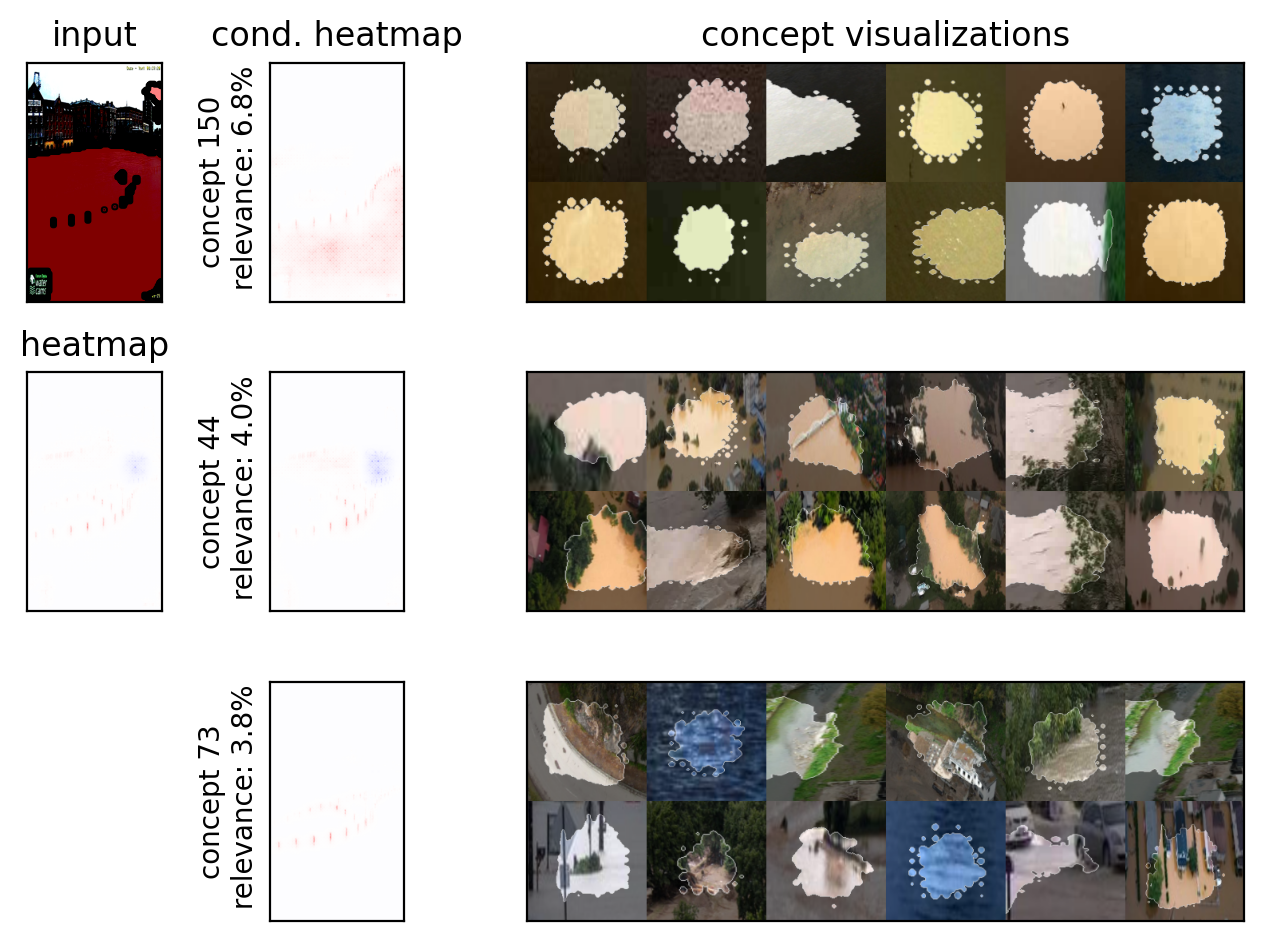

Done plotting.


In [16]:
# Setting up main parameters
class_id = 1
sample_id = 0
n_concepts = 3
n_refimgs = 12
layer = "layer5.0.conv1"
# layer = "layer1.1.conv1"
mode = "relevance"
prediction_num = 0

# if failing, try to restart the notebook and do not run analysis again, go directly to plotting
plot_explanations(model_name, model, dataset, sample_id, class_id, layer, prediction_num, mode, n_concepts, n_refimgs, output_dir=output_dir)

In [ ]:
# ==== Why you're seeing: IndexError: list index out of range ====
# Most likely one of these is true:
# 1) self.image_files / self.mask_files ended up EMPTY (0 items), because
#    filenames don’t align by stem (e.g., image: "123.jpg" vs mask: "123_mask.png").
# 2) The requested sample_id >= len(dataset).
# 3) Wrong split/path (e.g., directories exist but contain no matching files).
#
# Run this quick diagnostic to see what’s going on:

from pprint import pprint
import os

def debug_flooddataset_paths(ds):
    print("— FloodDataset debug —")
    print("image_dir:", ds.image_dir, "exists:", os.path.isdir(ds.image_dir))
    print("mask_dir :", ds.mask_dir,  "exists:", os.path.isdir(ds.mask_dir))
    print("#images:", len(ds.image_files))
    print("#masks :", len(ds.mask_files))
    if len(ds.image_files) > 0:
        print("first 5 images:", ds.image_files[:5])
    if len(ds.mask_files) > 0:
        print("first 5 masks :", ds.mask_files[:5])

# Example:
debug_flooddataset_paths(dataset)
print("dataset length:", len(dataset))
sample_id = min(sample_id, len(dataset)-1)
img, m = dataset[sample_id]


In [ ]:
print("— FloodDataset debug —")
print("image_dir:", dataset.image_dir, os.path.isdir(dataset.image_dir))
print("mask_dir :", dataset.mask_dir,  os.path.isdir(dataset.mask_dir))
print("#images:", len(dataset.image_files))
print("#masks :", len(dataset.mask_files))
print("dataset length:", len(dataset))

sample_id = min(sample_id, len(dataset)-1)
img_t, m_t = dataset[sample_id]
print("img:", img_t.shape, img_t.dtype, img_t.min().item(), img_t.max().item())
print("msk:", m_t.shape,  m_t.dtype,  m_t.unique(sorted=True)[:5])


# PCX

In [23]:
import os
from torch.utils.data import DataLoader
from crp.concepts import ChannelConcept
from crp.helper import get_layer_names
from datetime import datetime
from tqdm import tqdm
from torchvision.utils import make_grid

# === CRP & Zennit ===
import zennit.image as zimage
from crp.image import imgify
from crp.concepts import ChannelConcept
from crp.helper import get_layer_names

In [28]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=8)
cc = ChannelConcept()

layer_names = get_layer_names(model, [torch.nn.Conv2d])
# # Setting up CRP 
attribution = ATTRIBUTORS[model_name](model)
composite = COMPOSITES[model_name](canonizers=[CANONIZERS[model_name]()])
condition = [{"y": 1}]
fv = VISUALIZATIONS[model_name](attribution,
                                 dataset,
                                 layer_names,
                                 preprocess_fn=lambda x: x,
                                 path=output_dir,
                                 max_target="max")

 # Runs faster on MPS
device = "cpu"
model.to(device)
model.eval()

start = datetime.now()

activations = {}
attributions = {}
for i, (x, y) in enumerate(tqdm(dataset)):
     x = x.to(device).requires_grad_()
     condition = [{"y": 1}]
     attr = attribution(x.unsqueeze(0), condition, composite, record_layer=layer_names)

     for layer_name in layer_names:
         if layer_name in attr.activations.keys():
             if layer_name not in attributions.keys():
                 attributions[layer_name] = []
                 activations[layer_name] = []
             activations[layer_name].append(attr.activations[layer_name].amax((-2, -1)))
             attributions[layer_name].append(cc.attribute(attr.relevances[layer_name], abs_norm=True))
for layer_name in layer_names:
     #if layer_name in attribution.keys():
         attributions[layer_name] = torch.cat(attributions[layer_name])
         activations[layer_name] = torch.cat(activations[layer_name])
         folder = f"/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/examples/output/pcx/pidnet_flood_new/{layer_name}/"
         # attributions[layer_name] = torch.cat(attributions[layer_name])
         # activations[layer_name] = torch.cat(activations[layer_name])
         os.makedirs(folder, exist_ok=True)
         np.save(folder + "attributions", attributions[layer_name].cpu().numpy())
         np.save(folder + "activations", activations[layer_name].cpu().numpy())
end = datetime.now()

100%|██████████| 915/915 [16:11<00:00,  1.06s/it]


KeyError: 'spp.scale_process.2'

In [ ]:
# Loading
layer_names = get_layer_names(model, [torch.nn.Conv2d])
layer_name = layer_names[50]
print(layer_name)
folder = f"/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/examples/output/pcx/pidnet_flood/{layer_name}/"
attributions = torch.from_numpy(np.load(folder + "attributions.npy"))
activations = torch.from_numpy(np.load(folder + "activations.npy"))
indices = np.arange(len(dataset))

num_prototypes = {
   
}

In [ ]:
from umap import UMAP


embedding_attr = UMAP(n_neighbors=5, random_state=123, n_jobs=1)
X_attr = embedding_attr.fit_transform(attributions.detach().cpu().numpy())
x_attr, y_attr = X_attr[:, 0], X_attr[:, 1]

embedding_act = UMAP(n_neighbors=5, random_state=123, n_jobs=1)
X_act = embedding_act.fit_transform(activations.detach().cpu().numpy())
x_act, y_act = X_act[:, 0], X_act[:, 1]

In [ ]:
from scipy import stats
from sklearn.mixture import GaussianMixture

N_PROTOTYPES = 8

fig, axes = plt.subplots(1, 2, dpi=300, figsize=(5, 3), facecolor='white')
for i, X in enumerate([X_attr, X_act]):
    x, y = X[:, 0], X[:, 1]
    xmin = x.min() - 2
    xmax = x.max() + 2
    ymin = y.min() - 2
    ymax = y.max() + 2
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values, 0.5)
    Z = np.reshape(kernel(positions).T, X.shape).T
    axes[i].contour(Z, extent=[xmin, xmax, ymin, ymax], cmap="Greys", alpha=0.3, extend='min', vmax=Z.max() * 1, zorder=0)
    axes[i].scatter(x, y, s=3, alpha=0.7, zorder=1)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(["attributions", "activations"][i])
    axes[i].plot([1], y[1], 'ko', markersize=5, label="test image")
    axes[i].legend()


prototypes = []
gmms = []
for i, (X, emb) in enumerate([(attributions, embedding_attr), (activations, embedding_act)]):
    gmms.append(GaussianMixture(n_components=N_PROTOTYPES, random_state=0).fit(X.detach().cpu().numpy()))
    prototypes.append(gmms[-1].means_)
    mean = emb.transform(gmms[-1].means_)
    axes[i].scatter(mean[:, 0], mean[:, 1], s=30, c="#1B4365", zorder=2, label="prototypes")
    for k, prot in enumerate(mean):
        axes[i].text(prot[0], prot[1], k, fontsize=4, color="white", ha="center", va="center")
    axes[i].legend()

plt.tight_layout()
fig.show()

In [ ]:
proto_attr = prototypes[0]

distances = np.linalg.norm(attributions[:, None, :].detach().cpu() - proto_attr, axis=2)
prototype_samples = np.argsort(distances, axis=0)[:8]
prototype_samples = indices[prototype_samples]

fig, axs = plt.subplots(1, N_PROTOTYPES, figsize=(1*N_PROTOTYPES, 8), dpi=200, facecolor='white')


for i in range(N_PROTOTYPES):
    grid = make_grid(
        [dataset[prototype_samples[j][i]][0] for j in range(8)],
        nrow=1,
        padding=0)
    grid = np.array(zimage.imgify(grid.detach().cpu()))
    img = imgify(grid)
    axs[i].imshow(img)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"{i}")


In [ ]:
from src import plot_pcx_explanations
print(dir(plot_pcx_explanations)) 

In [ ]:
print(layer_name)

In [ ]:
print(model)

In [ ]:
print(dataset)

ERROR:LCRP.utils.crp:Prediction time: 0.3782079219818115, Backward time: 0.6289300918579102, Full attribution time: 0.6368632316589355
ERROR:LCRP.utils.crp:Prediction time: 0.20805096626281738, Backward time: 0.6478438377380371, Full attribution time: 0.6663928031921387
ERROR:LCRP.utils.crp:Prediction time: 1.39162278175354, Backward time: 3.6944751739501953, Full attribution time: 3.755976915359497
ERROR:LCRP.utils.crp:Prediction time: 1.38047194480896, Backward time: 3.3495731353759766, Full attribution time: 3.394577980041504


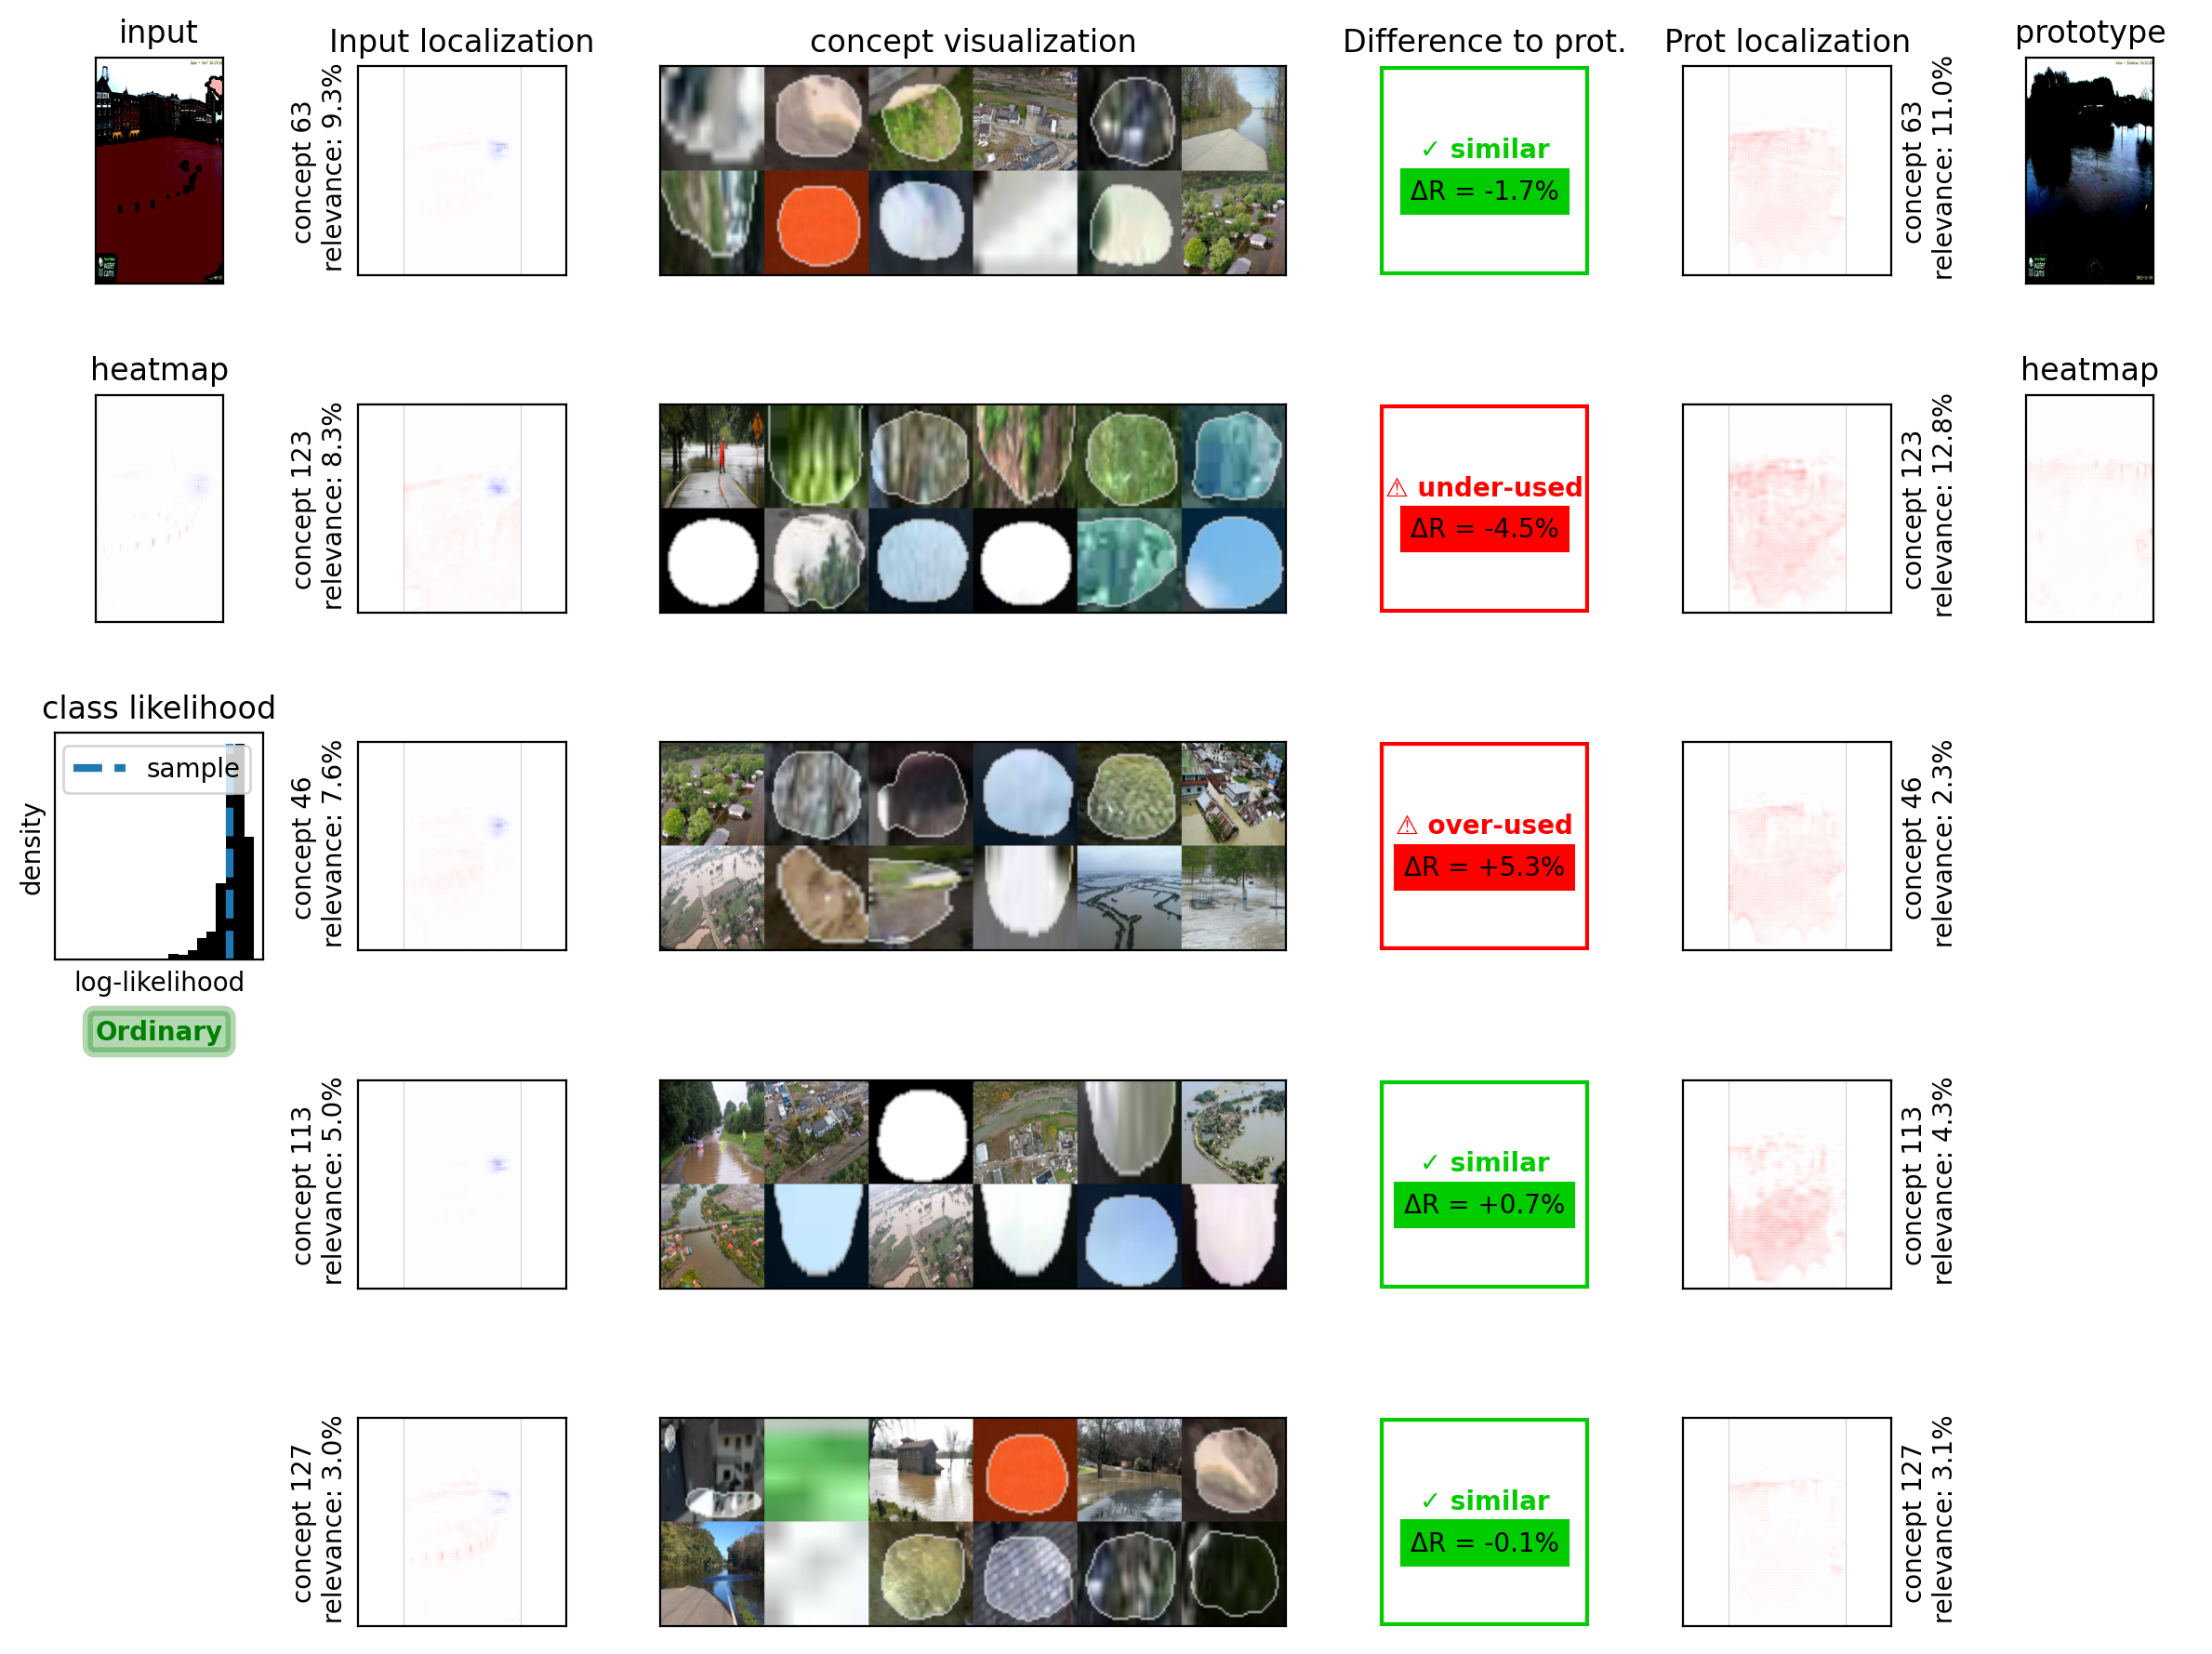

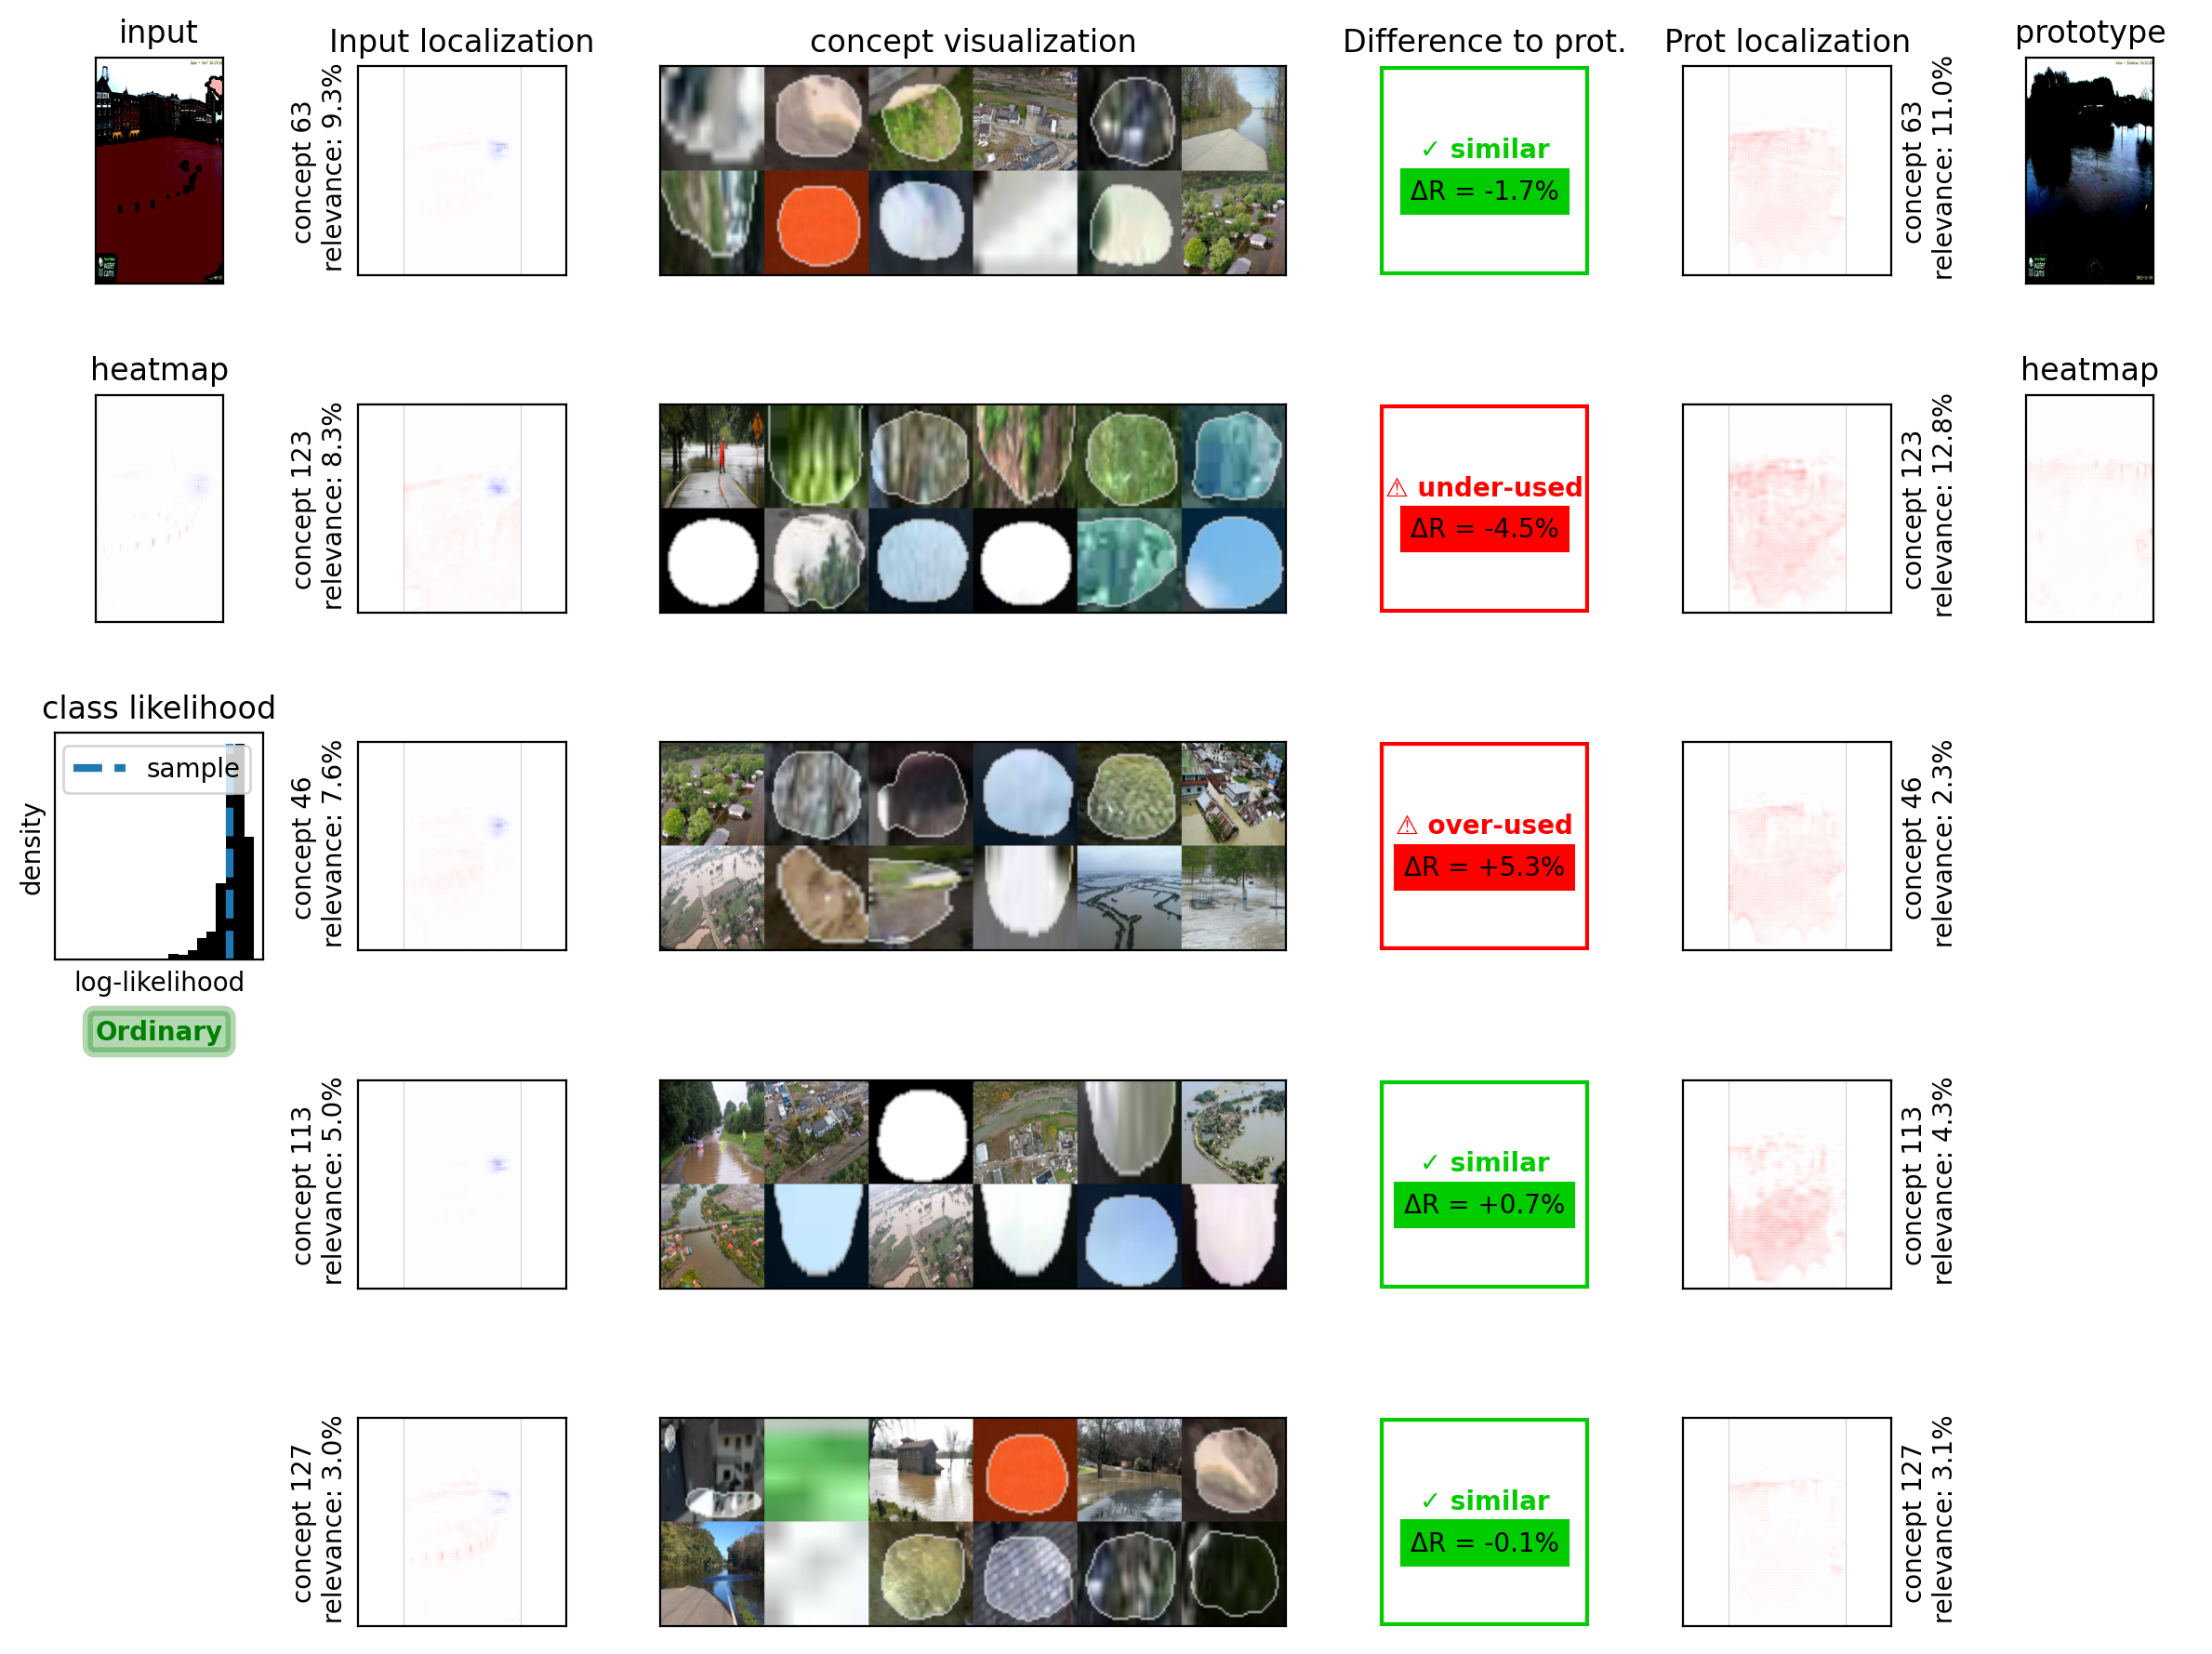

In [30]:
from src.plotpcx_gpu import plot_pcx_explanations

plot_pcx_explanations("pidnet", model.to(device= device), dataset, sample_id=0, layer_name='layer3.0.conv1', n_concepts=5, n_refimgs=12, num_prototypes=5, ref_imgs_path="/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/examples/output/ref_imgs_pidnet/", output_dir_crp="/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/examples/output/crp/pidnet_flood", output_dir_pcx="/Users/heydari/Documents/TEMA-FHHI-PY/FHHI-XAI/examples/output/pcx/pidnet_flood_new")


In [ ]:
print(layer_name)

In [ ]:
x, y = dataset[200]
print("Sample shape:", x.shape)


In [ ]:
dummy = torch.randn(1, 3, 256, 256)  # try with 3 channels first
output = model(dummy)
print("Output shape:", output.shape)
